# Model Comparison - Sample size

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from matplotlib.ticker import ScalarFormatter
from PIL import Image
from Model_comparison_functions import *

Set path:
Two paths here.
 -  One comparing both stochastic and Feature
 - Another looking at bigger samples when Feature increases


### For Stochastic and Feature

In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Sample_size_Sto_Feature\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [4]:
SampleSizes = [2,4,5,7,9,11]

In [5]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=1, SampleSizes=SampleSizes)

In [6]:
print(np.shape(Array))

(1, 6, 88, 5, 2, 1)


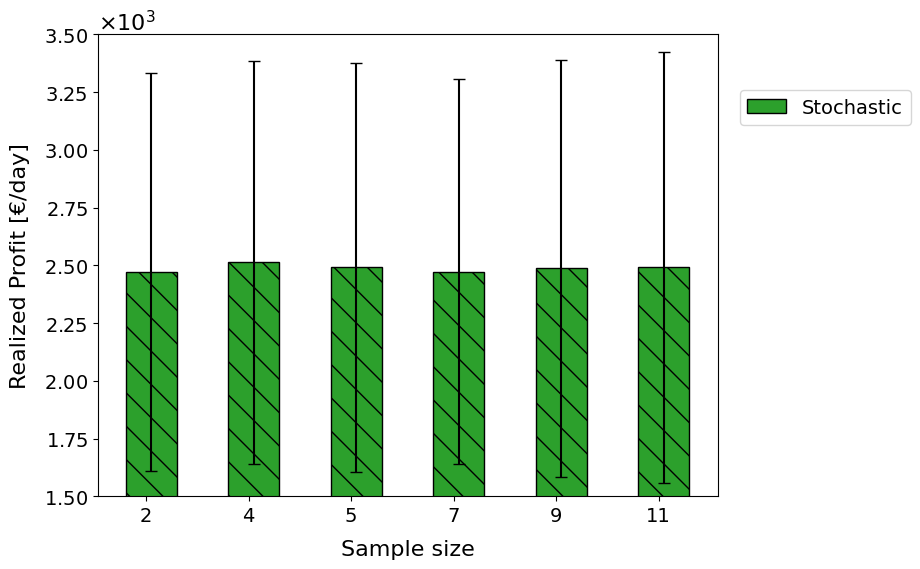

In [7]:
x_axis_tick_label = SampleSizes
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5

plot_profit_Test(Array,PlotCase = "Sample size",Selected_models = ['Stochastic'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'],legends = ['Stochastic','Feature'], barwidth = 0.5,y_axis_label = 'Realized Profit [\u20AC/day]',ylim=[1.5*10**3,3.5*10**3],pdf_name = 'Profit_bar_sto_fea_samplesize', ShowEachTestDay = False,save = True)

In [8]:
Array_mean = np.mean(Array,axis=2)
print(Array_mean[0,:,:,1,0])

[[   0.            0.         2472.16534515 2669.59674876    0.        ]
 [   0.            0.         2512.8037656  2698.99314517    0.        ]
 [   0.            0.         2490.99079672 2680.98759852    0.        ]
 [   0.            0.         2473.5292287  2669.91463891    0.        ]
 [   0.            0.         2487.78167491 2668.365023      0.        ]
 [   0.            0.         2492.06983428 2679.32529448    0.        ]]


### Solely the Feature GA

In [9]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Feature_Sample_size\\GA\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [10]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [11]:
SampleSizes = [2,5,10,20,40,80,160,320,365]

In [12]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=SampleSizes)
print(np.shape(Array))

(2, 9, 88, 5, 2, 1)


(1, 9, 88, 5, 2, 1)


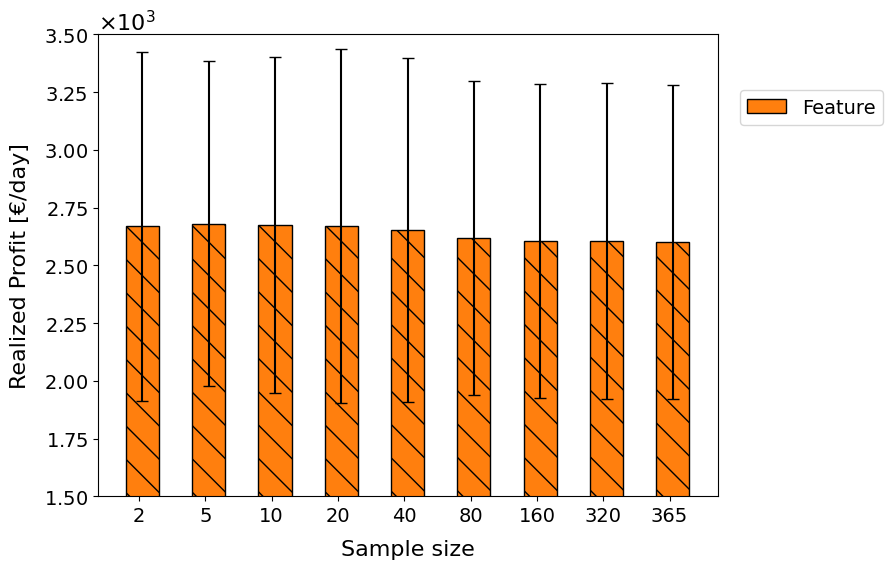

In [13]:
x_axis_tick_label = SampleSizes
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
# Assuming `Array` is your original array with shape (N, A, B, C, D, E)
Array_perfect_forecast = Array[0, np.newaxis, :, :, :, :]
print(np.shape(Array_perfect_forecast))

plot_profit_Test(Array_perfect_forecast,PlotCase = "Sample size",Selected_models = ['Feature'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'],legends=['Feature'], barwidth = 0.5,y_axis_label = 'Realized Profit [\u20AC/day]',ylim=[1.5*10**3,3.5*10**3],pdf_name = 'Profit_bar_fea_base_samplesize', ShowEachTestDay = False,save = True)

### Solely the Feature HA

In [14]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Feature_Sample_size\\HA\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [22]:

Add_on_path_list = ["2\\","5\\","10\\","20\\","40\\","80\\","365\\"]
Array = np.empty( (1, len(Add_on_path_list), 88, 5, 2,1 ) )
for p,paths in enumerate(Add_on_path_list):

    df_Exp_profit = json_to_df(current_directory + Add_on_path + paths +  'Exp_profit.json')
    df_RT_profit  = json_to_df(current_directory + Add_on_path + paths + 'RT_profit.json')
    #print(df_Exp_profit)
    # Setup the arrays
    


    for col in df_Exp_profit.columns:
        
        # Create a four dimensional 

        # (M, D, Model)
        
        # Assign the month, the day, the model, and each of the 

        # Extract the 'm', 'd', and 't' values from column name
        parts = col.split('_')

        m = p
        
        f = 1
        
        d = int(parts[2][3:])



        Array[(f-1),(m),(d-1),0,0,0] = df_Exp_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,0,0] = df_Exp_profit[col]['det']
        Array[(f-1),(m),(d-1),2,0,0] = df_Exp_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,0,0] = df_Exp_profit[col]['feature']
        #print(df_Exp_profit[col]['feature'])
        Array[(f-1),(m),(d-1),4,0,0] = df_Exp_profit[col]['oracle']
        
        Array[(f-1),(m),(d-1),0,1,0] = df_RT_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,1,0] = df_RT_profit[col]['det']
        Array[(f-1),(m),(d-1),2,1,0] = df_RT_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,1,0] = df_RT_profit[col]['feature']
        Array[(f-1),(m),(d-1),4,1,0] = df_RT_profit[col]['oracle']

    print(Array[(f-1),(m),24,3,1,0])
        


3247.587415480224
3247.5874154802254
3325.4021757232867
3321.1806983442143
3330.3605397495867
3364.326515663665
3313.561180288635


In [23]:
SampleSizes = [2,5,10,20,40,80,365]

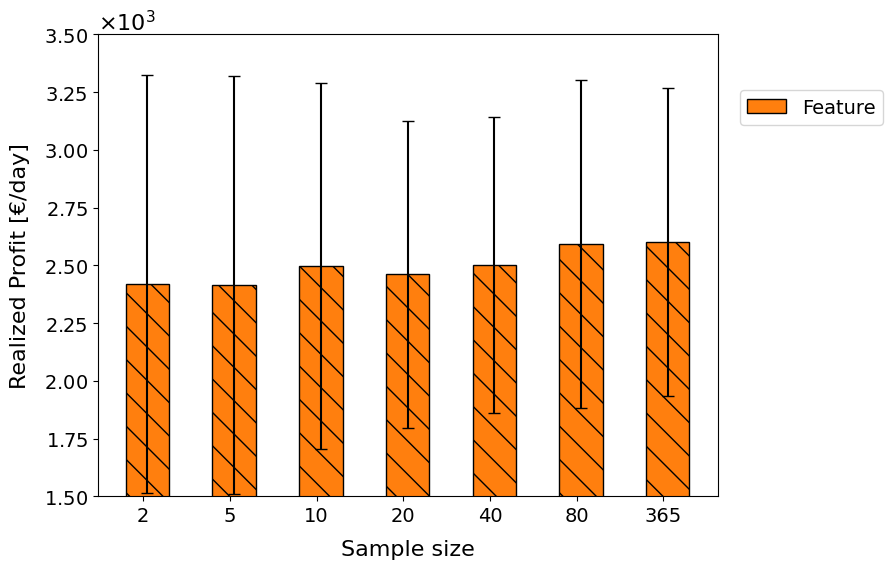

In [25]:
x_axis_tick_label = SampleSizes
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5

plot_profit_Test(Array,PlotCase = "Sample size",Selected_models = ['Feature'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'],legends=['Feature'], barwidth = 0.5,y_axis_label = 'Realized Profit [\u20AC/day]', ylim = [1500,3500],pdf_name = 'Profit_bar_fea_perfect_samplesize', ShowEachTestDay = False,save = False)